In [3]:
from src.db_connection import connect_to_db, execute_query, close_connection
from src.data_processing import process_data, process_precipitation_data
from src.ubicaciones_config import ubicaciones
from src.utilidades_excel import guardar_graficos_en_lote  
from src.plotter_abiertos import plot_data

import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from scipy.interpolate import make_interp_spline, UnivariateSpline



EJECUTAR CONSULTA Y GRAFICAR

✓ Conexión establecida

Consultando datos de piezómetros desde 2025-11-01 hasta 2025-11-30...
Consultando datos de precipitación...
Procesando PA23-03-T...
⚠️ Todos los umbrales son NULL para PA23-03-T
⚠ No se encontraron umbrales en BD para PA23-03-T


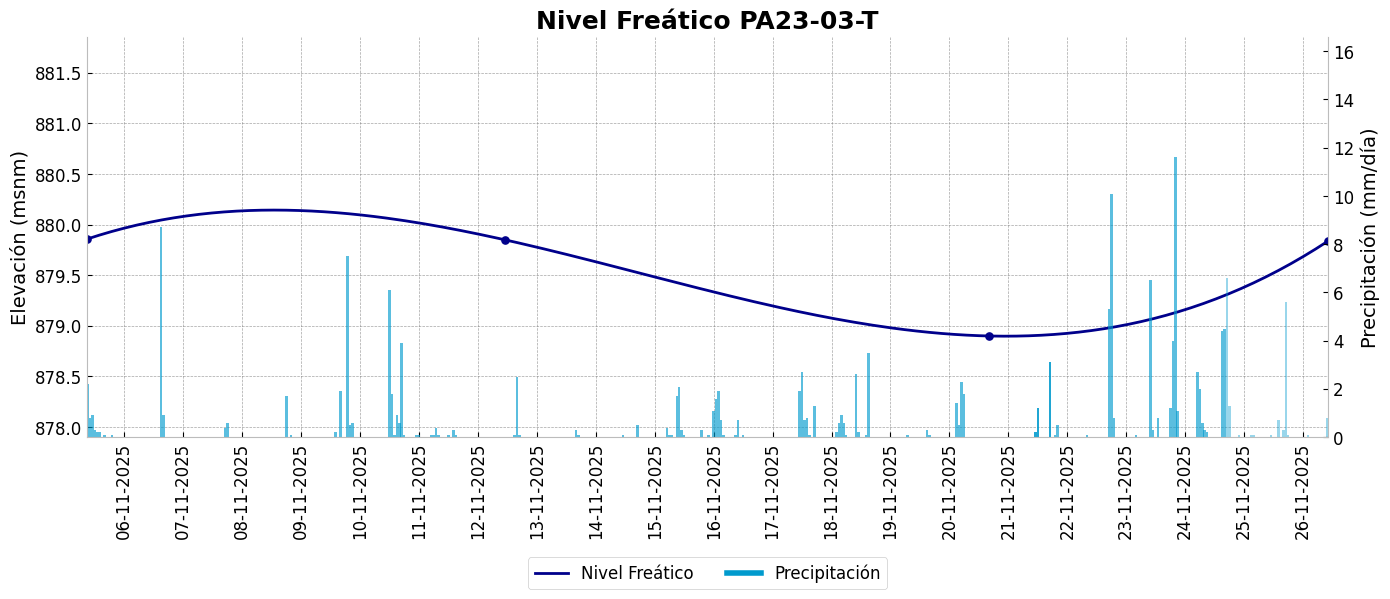

Procesando PA23-08-T...
⚠️ Todos los umbrales son NULL para PA23-08-T
⚠ No se encontraron umbrales en BD para PA23-08-T


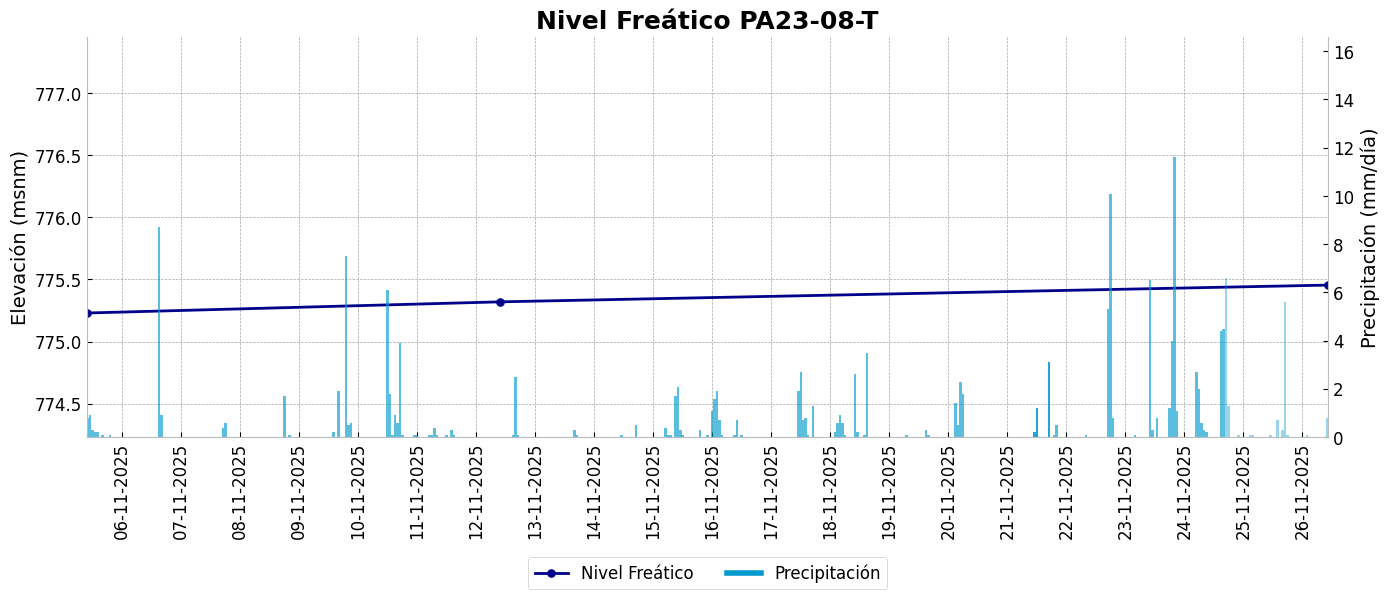

Procesando PA23-11-T...
⚠️ Todos los umbrales son NULL para PA23-11-T
⚠ No se encontraron umbrales en BD para PA23-11-T


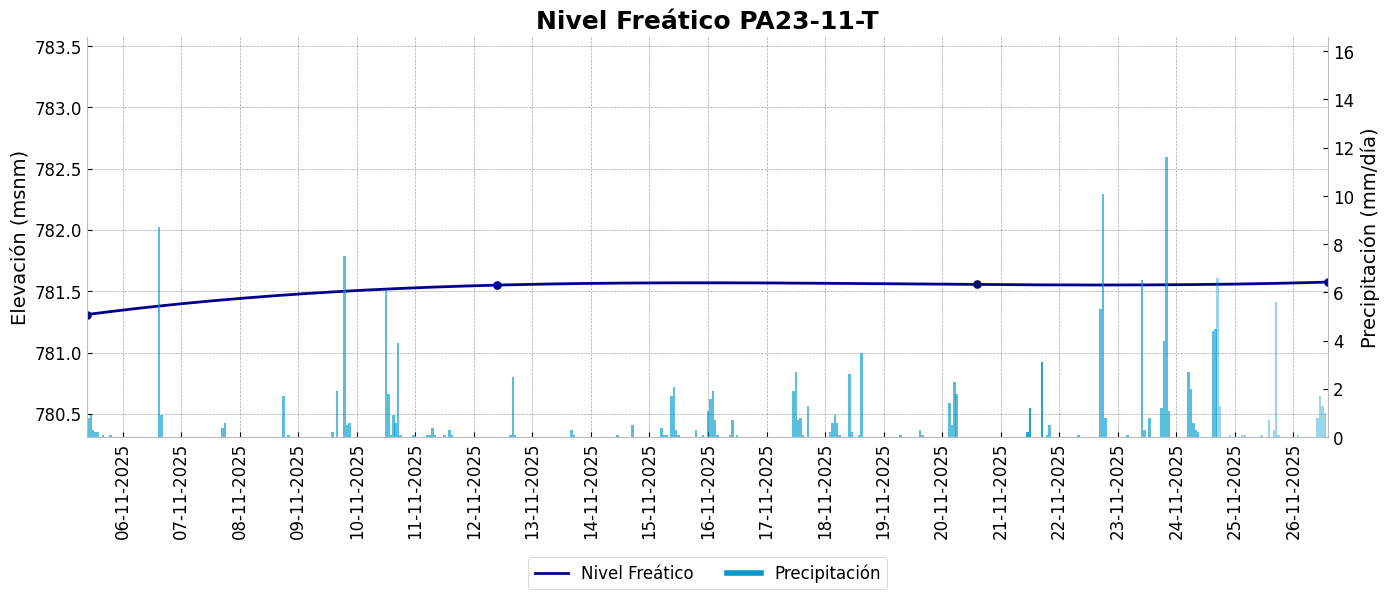

Procesando PA23-12-T...
⚠️ Todos los umbrales son NULL para PA23-12-T
⚠ No se encontraron umbrales en BD para PA23-12-T


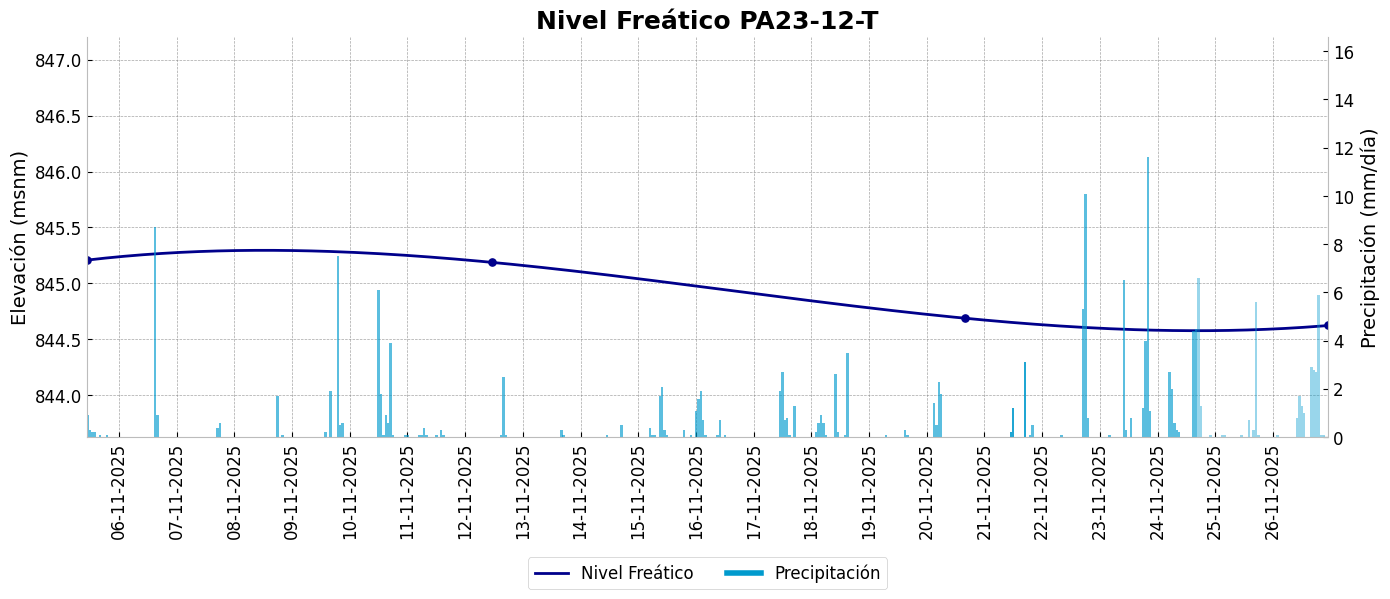

Procesando PA23-13-T...
⚠️ Todos los umbrales son NULL para PA23-13-T
⚠ No se encontraron umbrales en BD para PA23-13-T


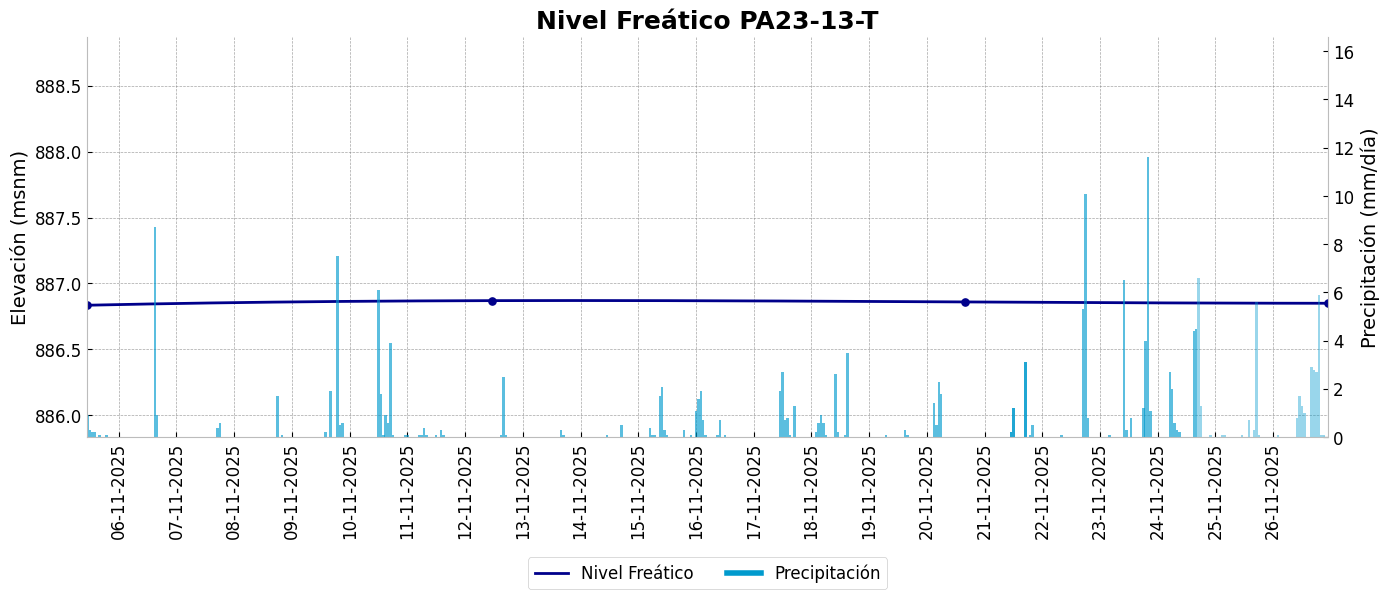

Procesando PA23-14-T...
⚠️ Todos los umbrales son NULL para PA23-14-T
⚠ No se encontraron umbrales en BD para PA23-14-T


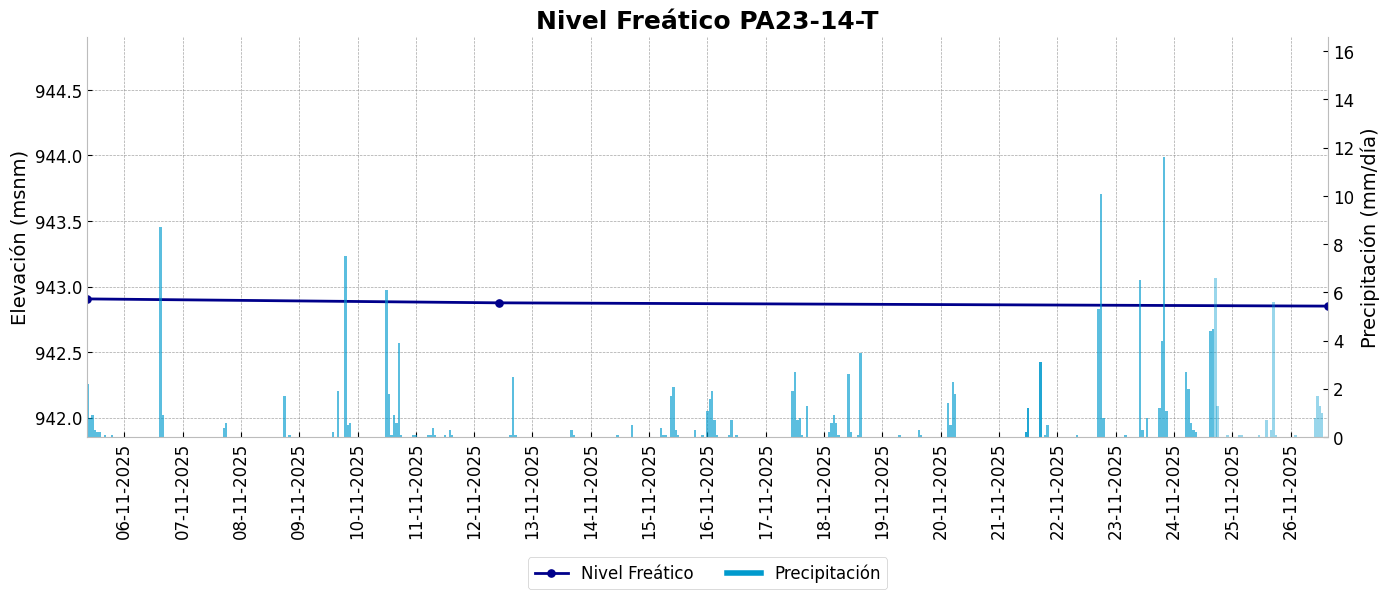

Procesando PA23-17A-T...
⚠️ Todos los umbrales son NULL para PA23-17A-T
⚠ No se encontraron umbrales en BD para PA23-17A-T


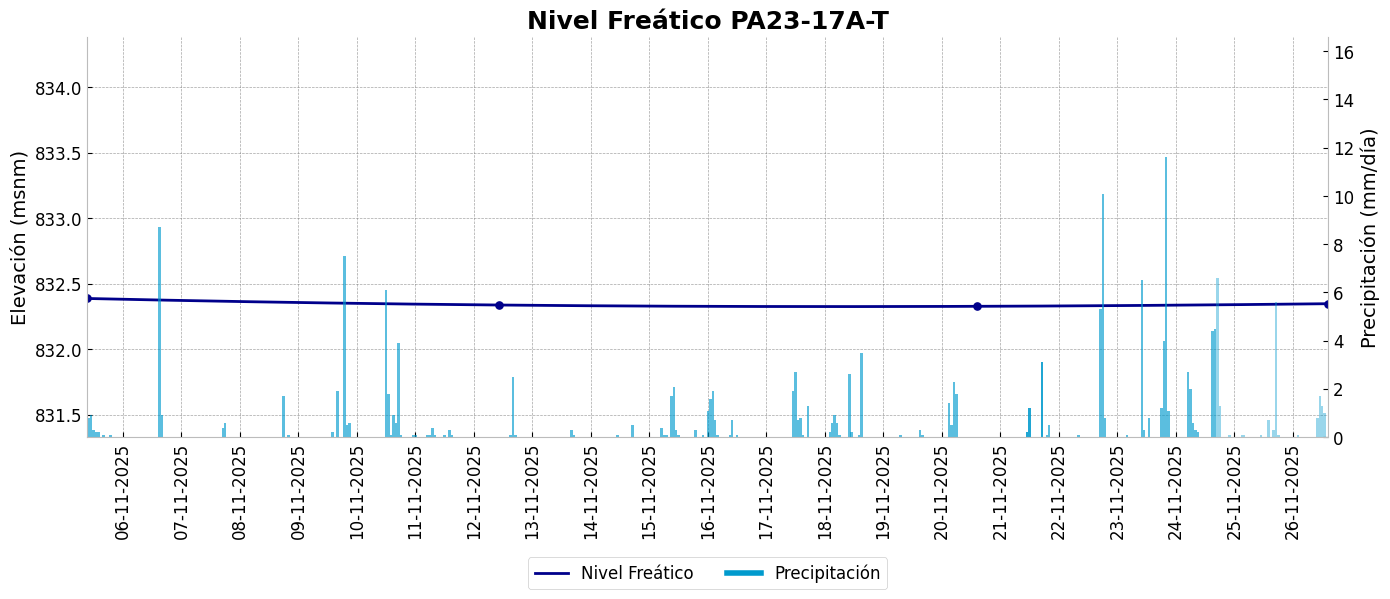

Procesando PA23-18-T...
⚠️ Todos los umbrales son NULL para PA23-18-T
⚠ No se encontraron umbrales en BD para PA23-18-T


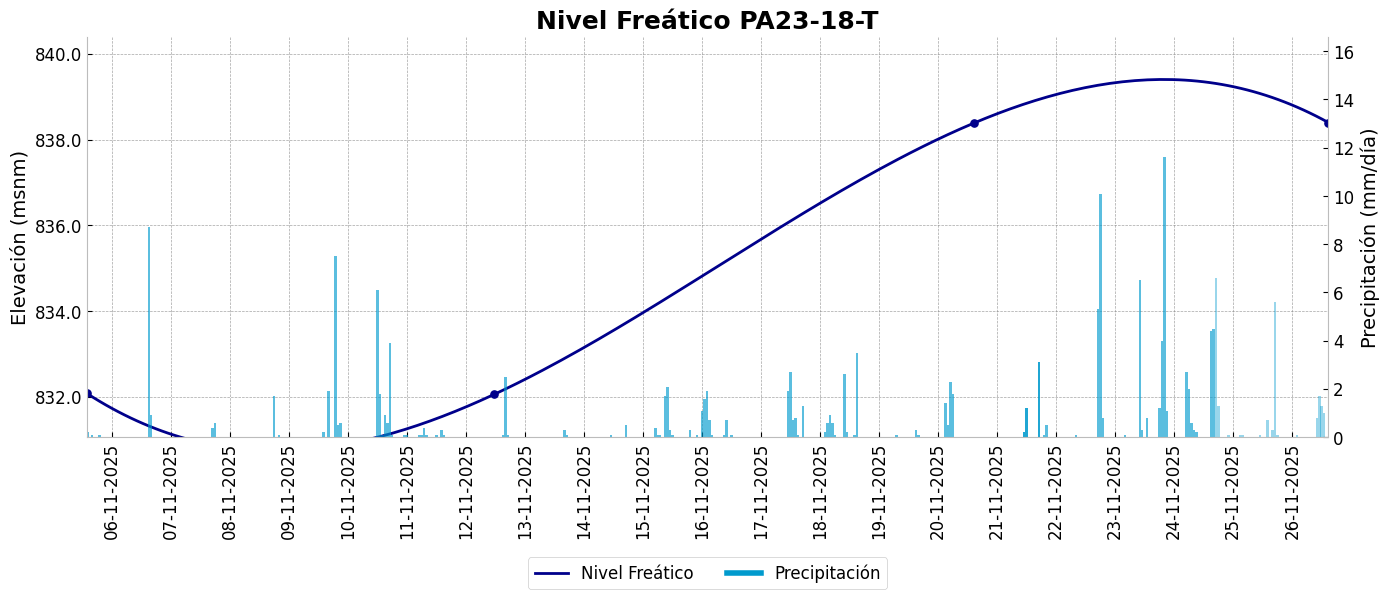

Procesando PA23-20A-T...
⚠️ Todos los umbrales son NULL para PA23-20A-T
⚠ No se encontraron umbrales en BD para PA23-20A-T


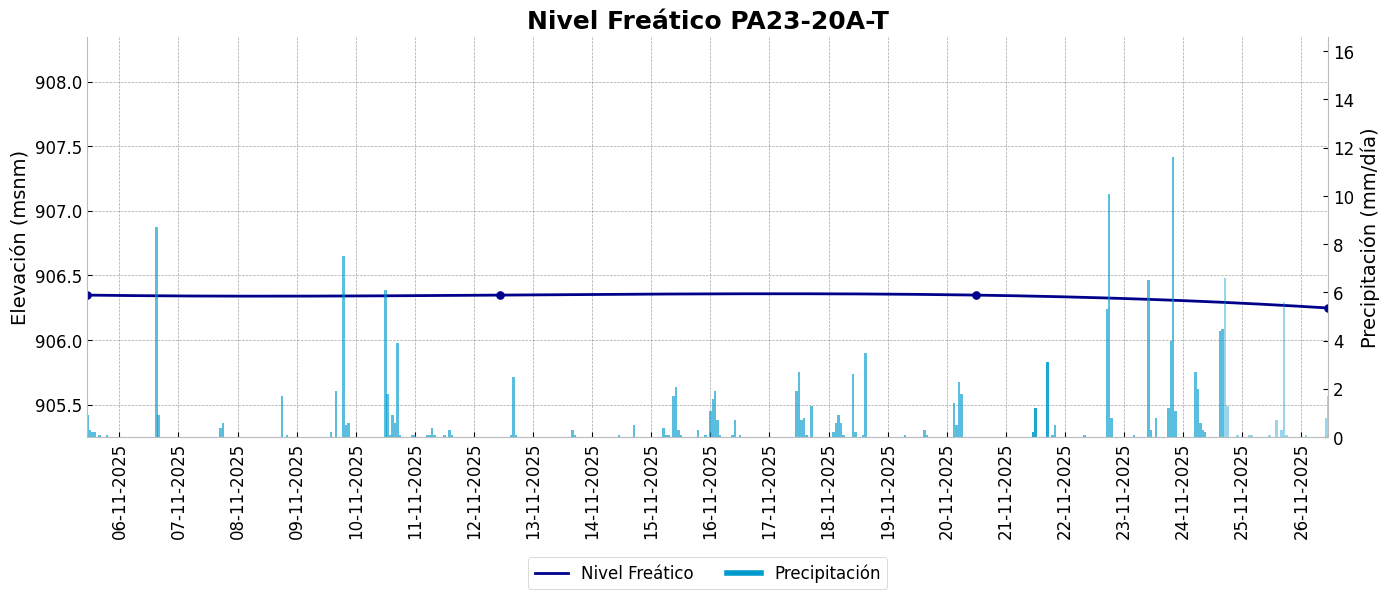

Procesando PA23-21-T...
⚠️ Todos los umbrales son NULL para PA23-21-T
⚠ No se encontraron umbrales en BD para PA23-21-T


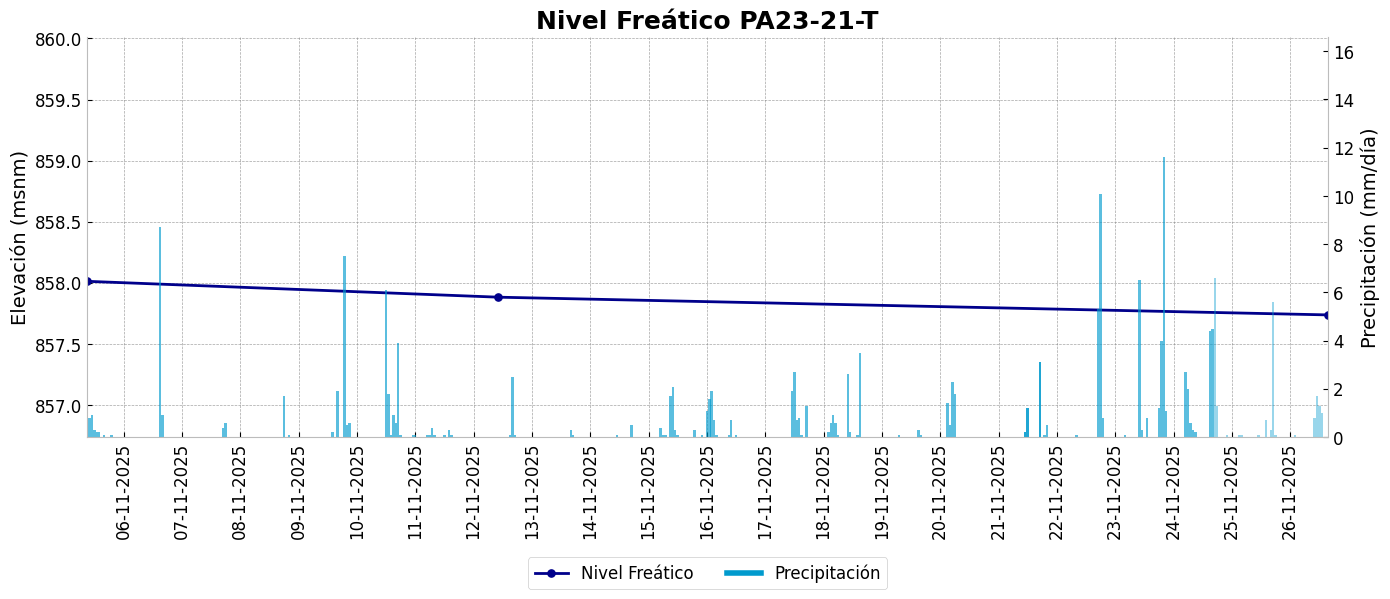

Procesando PA23-22-T...
⚠️ Todos los umbrales son NULL para PA23-22-T
⚠ No se encontraron umbrales en BD para PA23-22-T


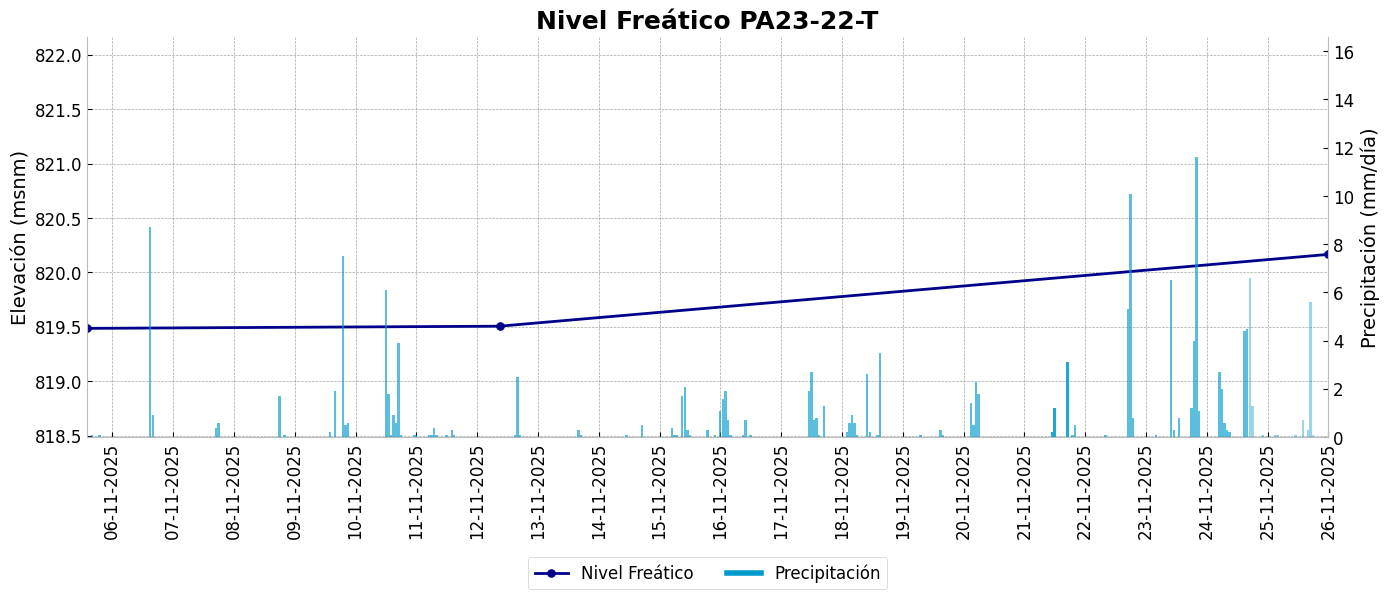

Procesando PA23-27-T...
⚠️ Todos los umbrales son NULL para PA23-27-T
⚠ No se encontraron umbrales en BD para PA23-27-T


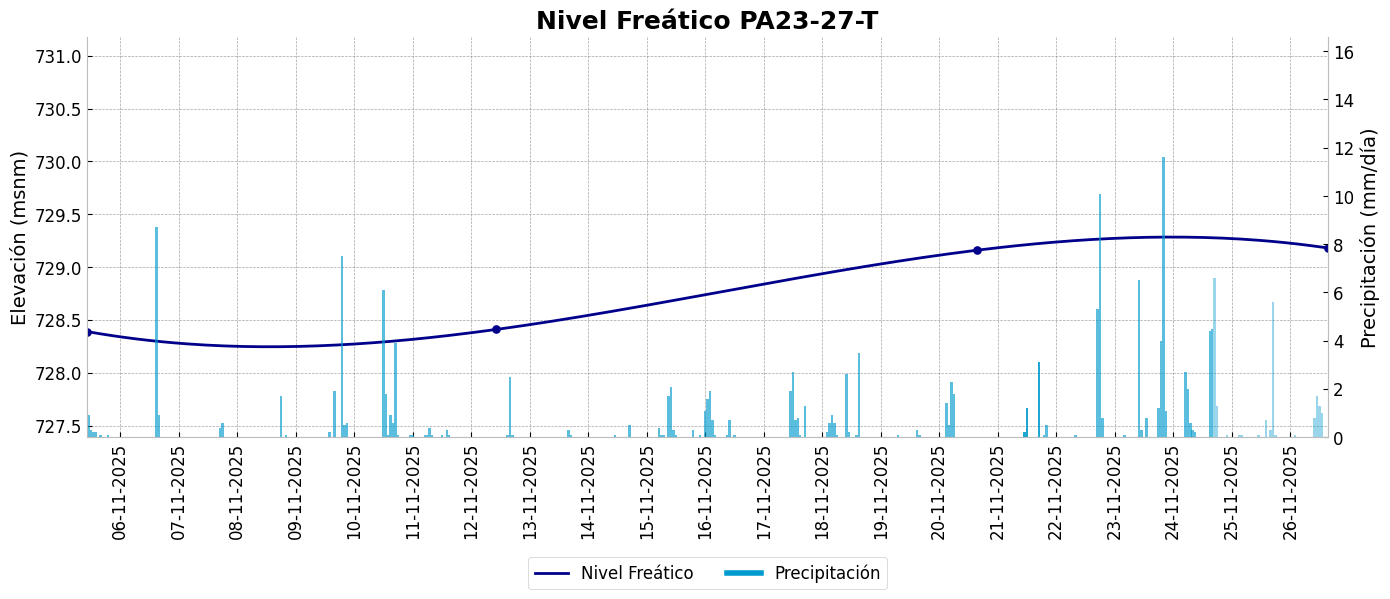

Procesando PA23-28-T...
⚠️ Todos los umbrales son NULL para PA23-28-T
⚠ No se encontraron umbrales en BD para PA23-28-T


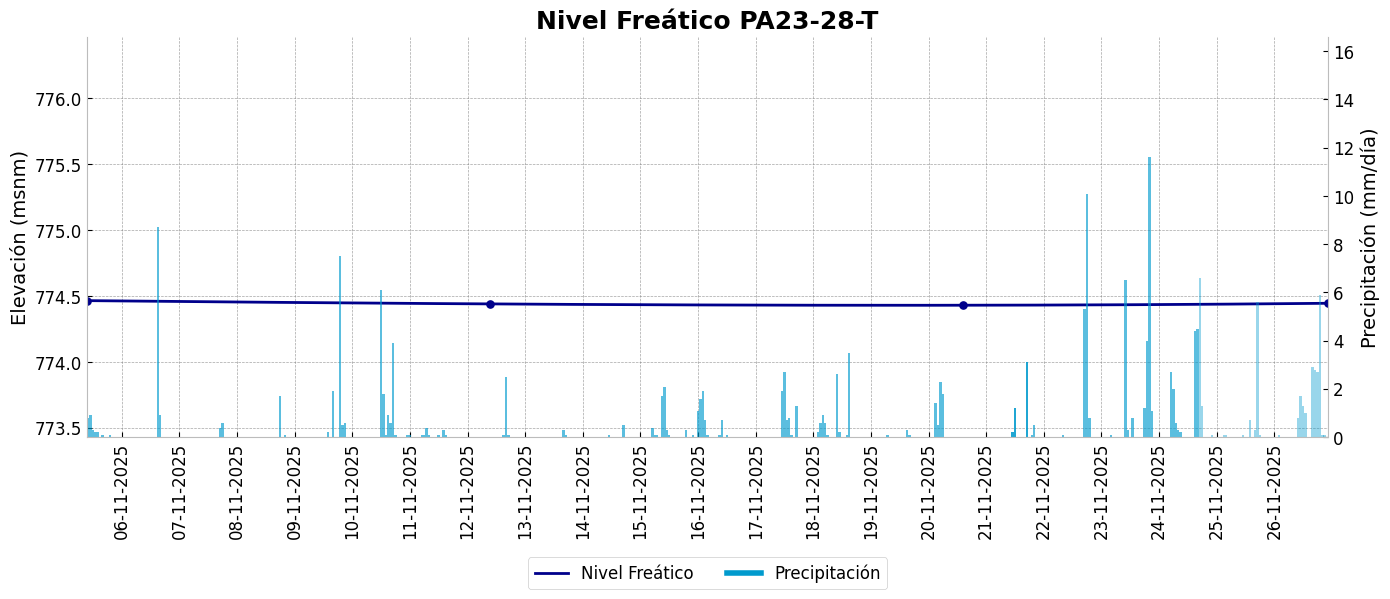

Procesando PA23-29-T...
⚠️ Todos los umbrales son NULL para PA23-29-T
⚠ No se encontraron umbrales en BD para PA23-29-T


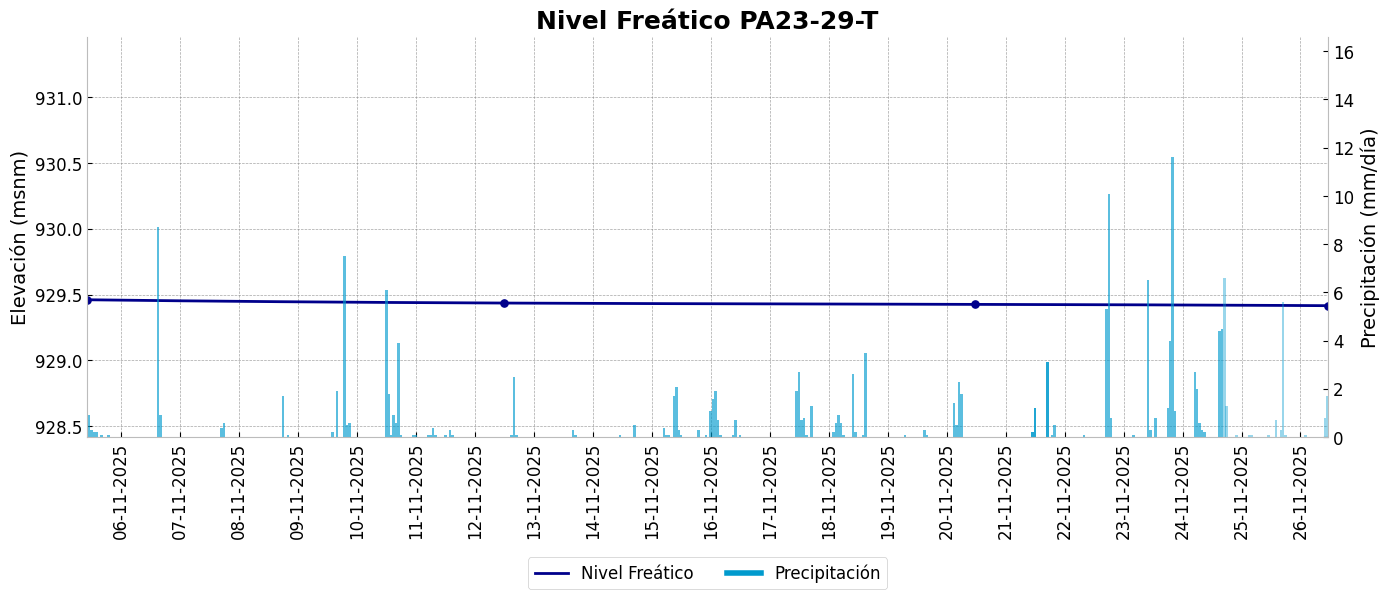

Procesando PA23-30-T...
⚠️ Todos los umbrales son NULL para PA23-30-T
⚠ No se encontraron umbrales en BD para PA23-30-T


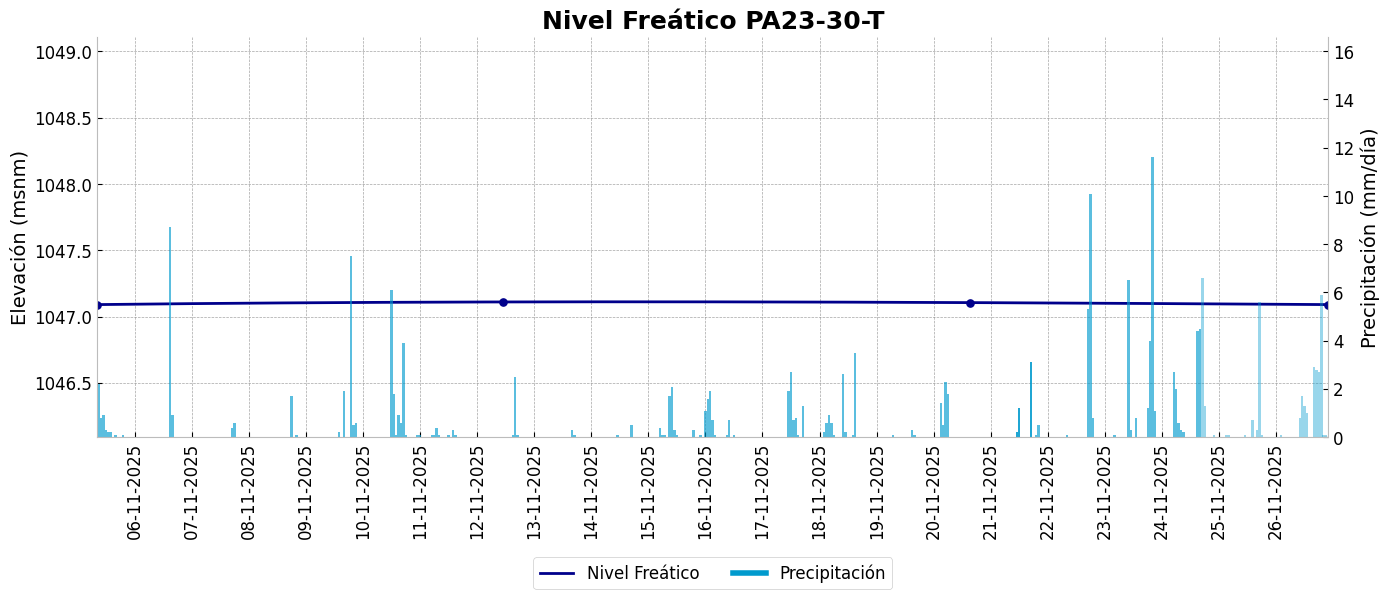

Procesando PA24-02-S...
⚠️ Todos los umbrales son NULL para PA24-02-S
⚠ No se encontraron umbrales en BD para PA24-02-S


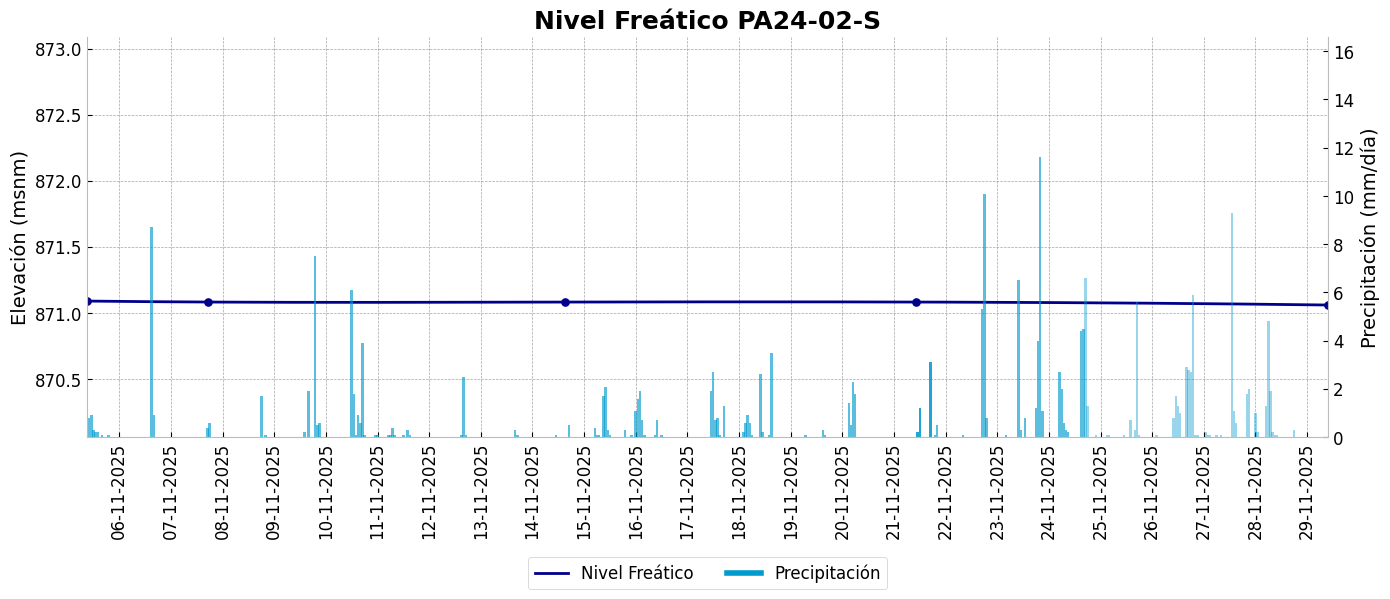

Procesando PA24-05-A-T...
⚠️ Todos los umbrales son NULL para PA24-05-A-T
⚠ No se encontraron umbrales en BD para PA24-05-A-T


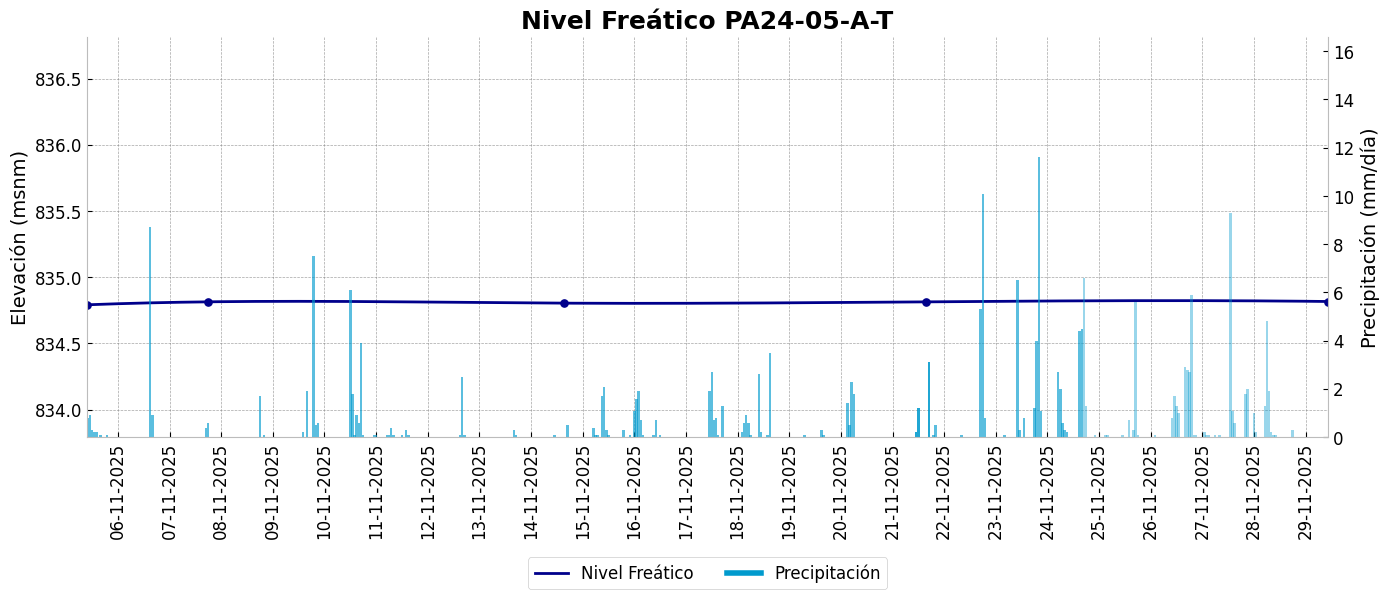

Procesando PA24-05-S...
⚠️ No hay datos válidos para graficar en PA24-05-S
Procesando PA24-05-T...
✓ Umbrales obtenidos de BD para PA24-05-T


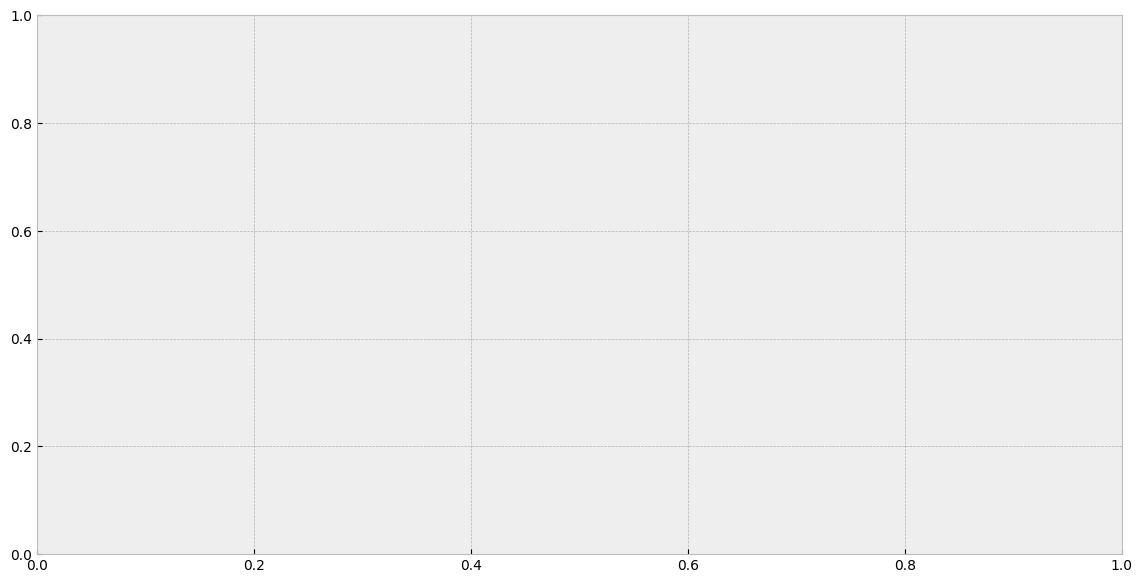

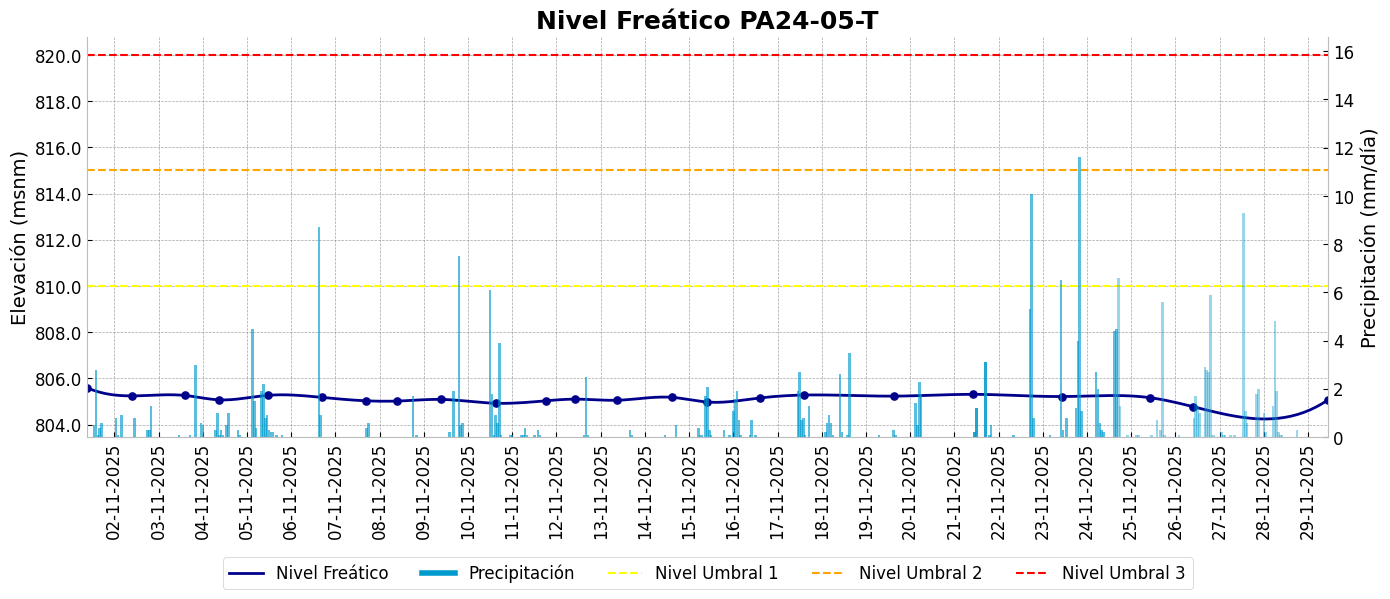

Procesando PA24-09-T...
✓ Umbrales obtenidos de BD para PA24-09-T


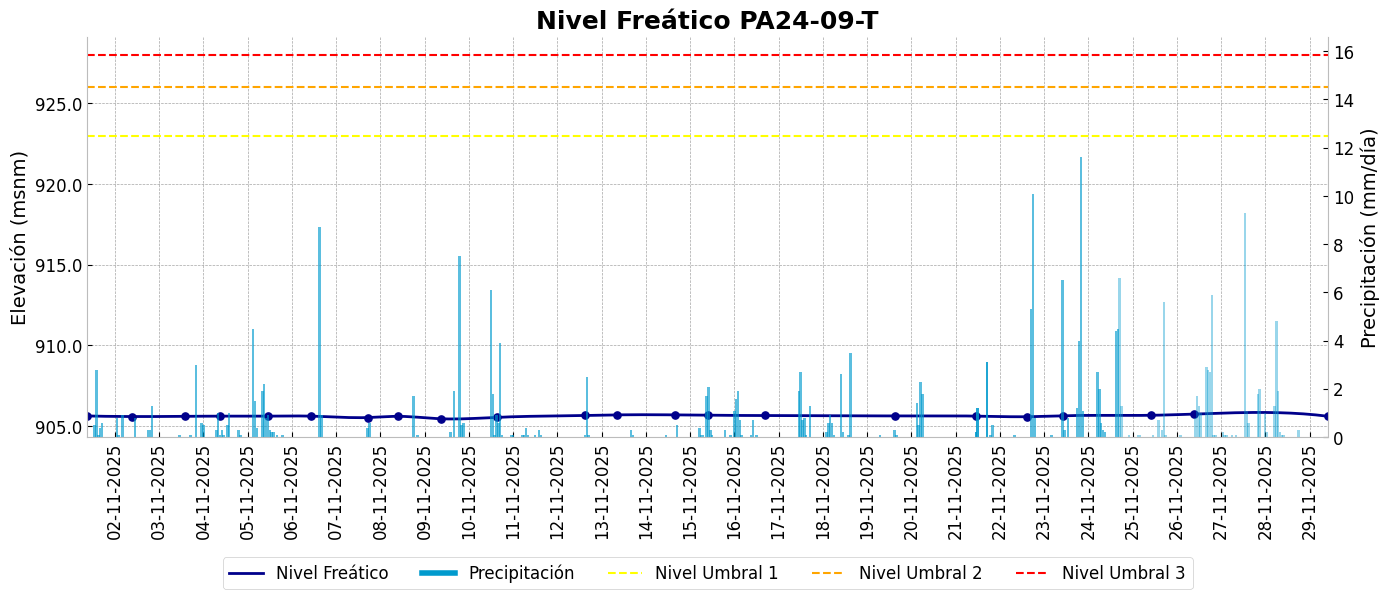

Procesando PA24-10-A-T...
⚠️ Todos los umbrales son NULL para PA24-10-A-T
⚠ No se encontraron umbrales en BD para PA24-10-A-T


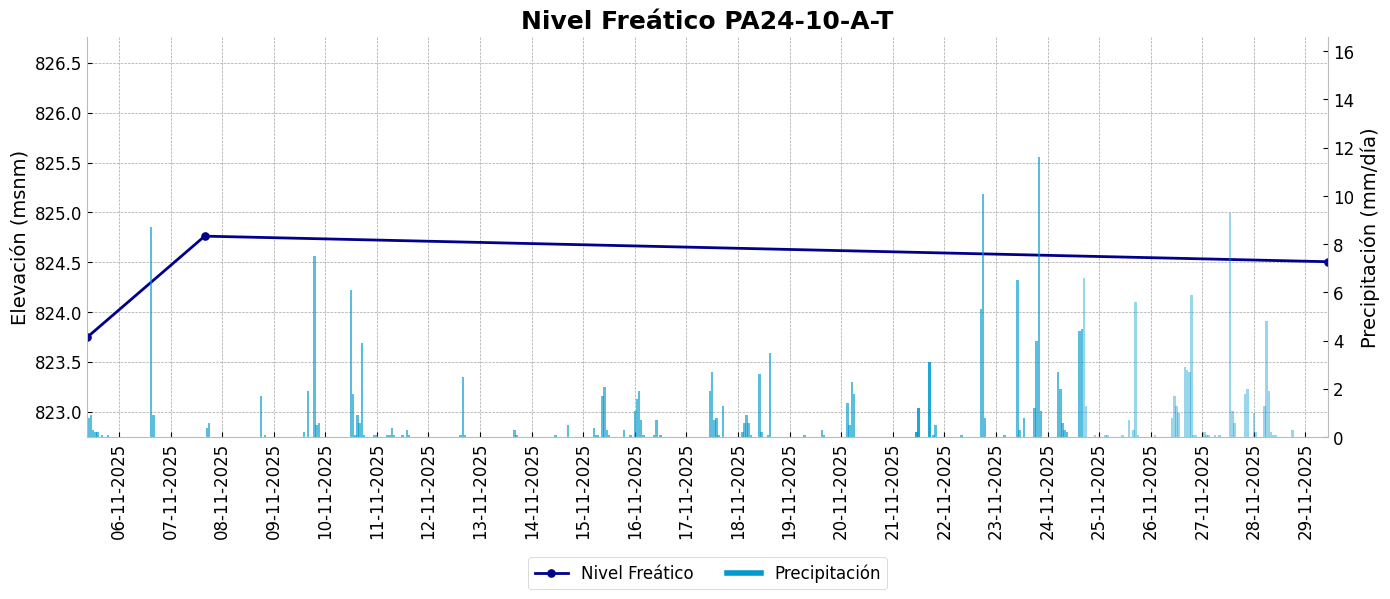

Procesando PA24-10-T...
⚠️ No hay datos válidos para graficar en PA24-10-T
Procesando PA24-11-T...
⚠️ Todos los umbrales son NULL para PA24-11-T
⚠ No se encontraron umbrales en BD para PA24-11-T


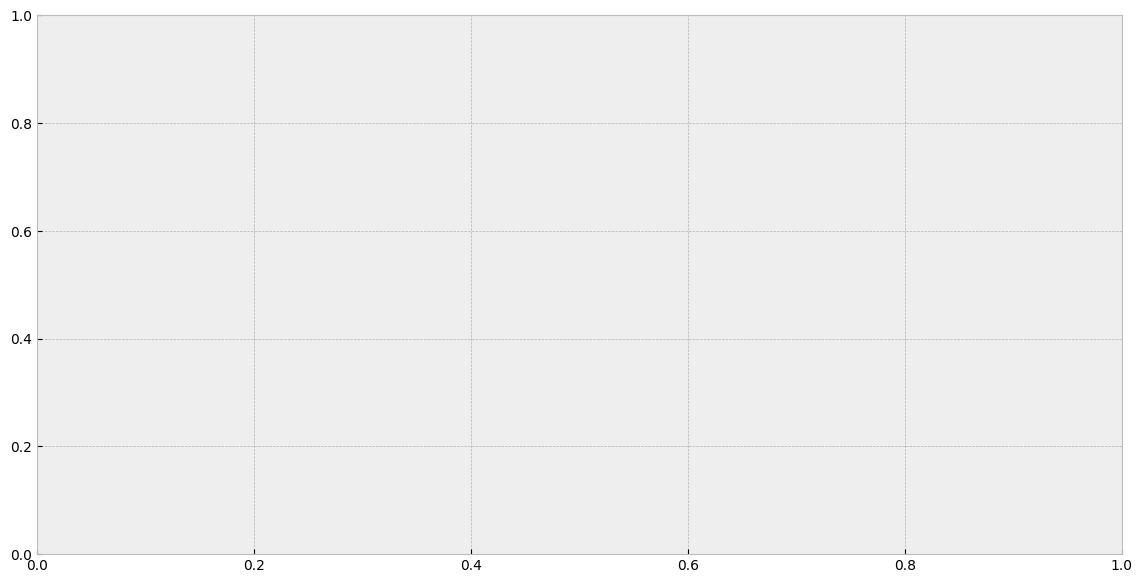

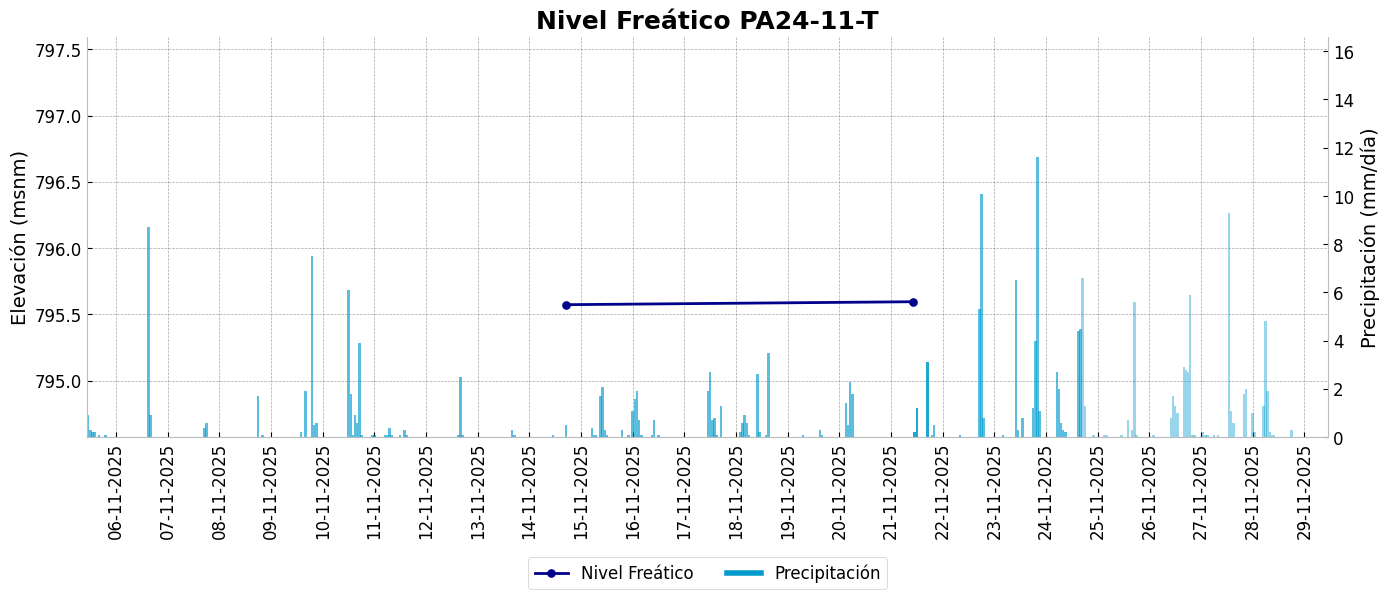


📝 Insertando gráficos en Excel...
  ✓ PA23-03-T → PA23-03-T:C20
  ✓ PA23-08-T → PA23-08-T:C20
  ✓ PA23-11-T → PA23-11-T:C20
  ✓ PA23-12-T → PA23-12-T:C20
  ✓ PA23-13-T → PA23-13-T:C20
  ✓ PA23-14-T → PA23-14-T:C20
  ✓ PA23-17A-T → PA23-17A-T:C20
  ✓ PA23-18-T → PA23-18-T:C20
  ✓ PA23-20A-T → PA23-20A-T:C20
  ✓ PA23-21-T → PA23-21-T:C20
  ✓ PA23-22-T → PA23-22-T:C20
  ✓ PA23-27-T → PA23-27-T:C20
  ✓ PA23-28-T → PA23-28-T:C20
  ✓ PA23-29-T → PA23-29-T:C20
  ✓ PA23-30-T → PA23-30-T:C20
  ✓ PA24-02-S → PA24-02-S:C20
  ✓ PA24-05-A-T → PA24-05-A-T:C20
  ✓ PA24-05-T → PA24-05-T:C20
  ✓ PA24-09-T → PA24-09-T:C20
  ✓ PA24-10-A-T → PA24-10-A-T:C20
  ✓ PA24-11-T → PA24-11-T:C20

✓ Gráficos insertados: 21
✓ Archivos temporales eliminados

✓ Proceso completado: 21/23 gráficos generados

✓ Conexión cerrada


In [4]:
# Asegúrate de ejecutar las celdas anteriores antes de esta celda

# 📅 Parámetros de fecha para filtrar datos de la base de datos
fecha_inicio = '2025-11-01'
fecha_fin = '2025-11-30'

# Ruta del archivo Excel donde se insertarán los gráficos
excel_path = r"Reporte\2500-DRT-MGP-000-V0.xlsx"

# Conexión a la base de datos
conexion = connect_to_db(
    'localhost', # Host
    'postgres',  # Usuario
    'JONPER',  # Contraseña
    'postgres',  # Base de datos
    '5432')      # Puerto

# -------------------------------------
# 1. Consultar datos de piezómetros
# -------------------------------------
if not conexion:
    print("✗ No se pudo conectar a la base de datos. Terminando programa.")
    exit(1) 
print("✓ Conexión establecida\n")

try:
    # -------------------------------------
    # 1. Consultar datos de piezómetros
    # -------------------------------------
    print(f"Consultando datos de piezómetros desde {fecha_inicio} hasta {fecha_fin}...")
    
    query_pz = f'''
        SELECT 
            id_instrumento, 
            fecha,
            hora, 
            elevacion_piezometrica
        FROM "MV_PIEZOMETROS".pz_abiertos
        WHERE "fecha" BETWEEN '{fecha_inicio}' AND '{fecha_fin}' '''
    
    result, columns = execute_query(conexion, query_pz)

    if not result:
        print("✗ No se encontraron datos de piezómetros")
        close_connection(conexion)
        exit(1)

    df = process_data(result, columns)

    if df.empty: # Si el DataFrame no está vacío
        print("✗ DataFrame vacío después del procesamiento")
        close_connection(conexion)
        exit(1)

    # -------------------------------------
    # 2. Consultar datos de precipitación
    # -------------------------------------
    print("Consultando datos de precipitación...")
    
    query_precip = f'''
        SELECT fecha, hora, rain_mm_tot
        FROM "MV_NAD_DR"."00_em_via12"
        WHERE fecha BETWEEN '{fecha_inicio}' AND '{fecha_fin}'
        ORDER BY fecha, hora
    '''
    result_p, col_p = execute_query(conexion, query_precip)

    if result_p:
        df_precip = process_precipitation_data(result_p, col_p)
        # print(f"✓ {len(df_precip)} registros de precipitación cargados\n")
    else:
        print("⚠️ No hay datos de precipitación")
        df_precip = pd.DataFrame()
    
    # -------------------------------------
    # 3. Iterar por cada instrumento
    # -------------------------------------
    
    # Obtener los instrumentos únicos
    instrumentos_unicos = df['id_instrumento'].unique() 
   
    # Filtrar los instrumentos a omitir para no graficarlos
    instrumentos_inoperativos = {"PA24-03-A-T","PA24-28-T", 
                                 "PA24-02-T", "PA24-03-T"
                                }
    # Filtrar los instrumentos y ordenarlos alfabéticamente       
    instrumento = sorted([inst for inst in instrumentos_unicos # Filtrar los instrumentos
                            if inst not in instrumentos_inoperativos]) # Filtrar los instrumentos a omitir
        
    # Crear carpeta temporal
    TEMP_DIR = "temp_graficos"
    os.makedirs(TEMP_DIR, exist_ok=True)

    graficos_generados = 0
    graficos_info = [] # Almacenar información de los gráficos generados


    for sensor in instrumento:
        print(f"Procesando {sensor}...")

        # Filtrar los datos por instrumento
        df_instrumento = df[df['id_instrumento'] == sensor].copy() 

        if df_instrumento.empty:  # Verificar si el DataFrame está vacío
            print(f"Sin datos para {sensor} graficar.")
            continue

        sheet_name, cell = ubicaciones.get(sensor, ("Hoja1", "A1"))

        try:
            fig = plot_data(
                df_instrumento,
                df_precip,
                tabla=sensor,
                conexion=conexion,
                fecha_inicio=fecha_inicio,
                fecha_fin=fecha_fin,
                excel_path=excel_path,
                sheet_name=sheet_name,
                cell=cell
            )

            if fig:
                graficos_generados += 1

                # Guardar como PNG temporal
                png_path = os.path.join(TEMP_DIR, f"{sensor}.png")
                fig.savefig(png_path, format='png', bbox_inches='tight', dpi=100)

                # Guardar info para inserción posterior
                graficos_info.append((png_path, sheet_name, cell, sensor))               
                plt.show()
                plt.close(fig)  # Liberar memoria

        except Exception as e:
            print(f"  ✗ Error al generar gráfico para {sensor}: {e}")
            import traceback
            traceback.print_exc()

    # -------------------------------------
    # 5. Insertar TODOS los gráficos en Excel de una sola vez
    # -------------------------------------
    if graficos_info:
        guardar_graficos_en_lote(graficos_info, excel_path)
            
        # Limpiar archivos temporales
    try:
        shutil.rmtree(TEMP_DIR)
        print("✓ Archivos temporales eliminados")
    except Exception as e:
        print(f"⚠️ No se pudieron eliminar archivos temporales: {e}")
    print("\n" + "="*50)
    print(f"✓ Proceso completado: {graficos_generados}/{len(instrumento)} gráficos generados")
    print("="*50) 

except Exception as e:
    print(f"\n✗ Error en el proceso principal: {e}")
    import traceback
    traceback.print_exc()  

finally:
    # Cerrar conexión siempre
    close_connection(conexion)
    print("\n✓ Conexión cerrada")
